In [1]:
## prepare necessary packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import scipy.stats
from scipy import stats
from scipy.stats import chi2, chi2_contingency

###  Data Preparation

In [2]:
## read in csv as pandas dataframe

participant_data = pd.read_csv("final_data.csv")
print(participant_data.shape)
participant_data.head()

(175, 24)


,Study Name,"Year Posted (most recent, Physionet)",Year Published (Paper),Race,Race Present,Ethnicity,Ethnicity Present,Study sample size,Sex Present,Male,...,Age Present,Average Age,Min Age,Max Age,Country/Region,Location,Pre-existing conditions and/or Symptoms,Instruments used,Data Collected (differnent levels of),Field
0,A large scale 12-lead electrocardiogram databa...,Aug 2022,February 2020,X,0,X,0,"45, 152 patients",1,X,...,1,NaN,NaN,NaN,China,"Chapman University, Shaoxing People's Hospital...",Includes information about pre-existing condit...,GE MUSE ECG System,NaN,cardiac_electrophysiology
1,A multi-camera and multimodal dataset for post...,Nov 2021,X,X,0,X,0,14,1,10,...,1,25.4,18,30,Portugal,Portugal (University of Minho),No clinical history of any abnormalities,MVN BIOMECH,"walking straight in a corridor, turning right ...",gait/balance/motion
2,A Pressure Map Dataset for In-bed Posture Clas...,Sep 2017,Apr 2017,X,0,X,0,Experiment 1: 13 participants Ex...,0,X,...,1,26.9,19,34,USA,Texas (University of Texas at Dallas),X,Experiment 1: Vista Medical FSA SoftFlex 2048 ...,in-bed posture pressure data,other
3,A Wearable Exam Stress Dataset for Predicting ...,May 2022,Mar 2022,X,0,X,0,10,0,X,...,0,X,X,X,USA,Texas (University of Houston,X,Empatica E4 wristband,"electrodermal activity, heart rate, blood vol...",multi_parameter
4,Abdominal and Direct Fetal ECG Database,Aug 2012,2012,X,0,X,0,5 women in labor were analyzed,1,0,...,0,X,X,X,Poland,Department of Obstetrics at the Medical Univer...,Women in labor,"KOMPOREL System (ITAM Institute, Zabrze, Polan...",NaN,cardiac_electrophysiology


In [3]:
## assign column names, read in data, and print out the first 5 rows

data = participant_data[['Race Present', 'Ethnicity Present', 'Sex Present', 'Age Present']]
data = data.rename(columns={"Race Present": "Race", "Ethnicity Present": "Ethn.", "Age Present": "Age", "Sex Present": "Gender"})
data.head()
sums = data.sum()
print(sums)
data = data.astype(float)


Race       15
Ethn.       7
Gender    139
Age       138
dtype: int64


### Summary Analysis

Includes: summary statistics, reporting frequencies, age distributions

In [4]:
# Count rows where all four columns are 1
count_all_ones = data[(data['Race'] == 1) &
                      (data['Ethn.'] == 1) &
                      (data['Gender'] == 1) &
                      (data['Age'] == 1)].shape[0]

# Count rows where all four columns are 0
count_all_zeros = data[(data['Race'] == 0) &
                       (data['Ethn.'] == 0) &
                       (data['Gender'] == 0) &
                       (data['Age'] == 0)].shape[0]

# Count rows where at least one column is 1
count_at_least_one = data[
                       (data['Gender'] == 1) &
                       (data['Age'] == 1)].shape[0]

# Count rows where exactly two of the four columns are 0
count_two_zeros = data[(data['Race'] == 0) +
                       (data['Ethn.'] == 0) +
                       (data['Gender'] == 0) +
                       (data['Age'] == 0) == 2].shape[0]


print("Count of rows where all columns are 1:", count_all_ones)
print("Count of rows where all columns are 0:", count_all_zeros)
print("Count of rows where at least one column is 1:", count_at_least_one)
print("Count of rows where at least two columns are 1:", count_two_zeros)


Count of rows where all columns are 1: 6
Count of rows where all columns are 0: 26
Count of rows where at least one column is 1: 129
Count of rows where at least two columns are 1: 0


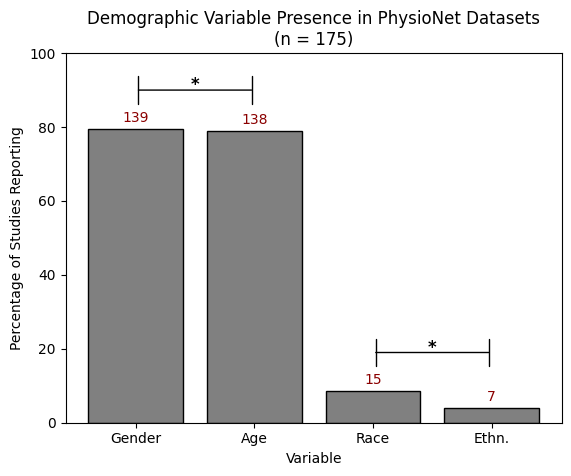

In [5]:
## Bar graph of demographics reporting frequency

def addlabels(x, y, c):
    for i in range(len(x)):
        plt.text(i, y[i]+2, c[i], ha='center', color='darkred')  # choose a color so the number above the bar is not confused with the y-axis labels

simple = {'Gender': sums[2] / 1.75, 'Age': sums[3] / 1.75, 'Race': sums[0] / 1.75, 'Ethn.': sums[1] / 1.75}

vars = list(simple.keys())
values = list(simple.values())

fig, ax = plt.subplots()
plt.bar(vars, values, color='grey', edgecolor='black')
plt.title('Demographic Variable Presence in PhysioNet Datasets\n(n = 175)')
plt.ylabel("Percentage of Studies Reporting")
plt.xlabel("Variable")
plt.ylim(0, 100)
# fig.set_size_inches(3, 3)
counts = [sums[2], sums[3], sums[0], sums[1]]
addlabels(vars, values, counts)

plt.annotate('*', xy=(.5, 90), ha='center', color='black', fontsize=12, weight='bold')
plt.annotate("", xy=(0, 90), xytext=(1, 90), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color='black'))

plt.annotate('*', xy=(2.5, 19), ha='center', color='black', fontsize=12, weight='bold')
plt.annotate("", xy=(2, 19), xytext=(3, 19), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color='black'))
# save as svg
# plt.savefig("dembar.svg", format="svg", bbox_inches="tight")
# plt.savefig("dembar.pdf", format="svg", bbox_inches="tight")
plt.show()


In [6]:
## isolate age data from total participants data

age_data = participant_data[['Age Present', 'Average Age', 'Min Age', 'Max Age']]
print(age_data.shape)
age_data.head()

(175, 4)


,Age Present,Average Age,Min Age,Max Age
0,1,NaN,NaN,NaN
1,1,25.4,18,30
2,1,26.9,19,34
3,0,X,X,X
4,0,X,X,X


In [7]:
age_data.replace("X", np.nan, inplace=True)
avg_age = age_data.dropna(subset=['Average Age'], inplace=True)
avg_age = age_data['Average Age'].astype(float)
print(avg_age.shape)
avg_age.head()
print(avg_age.describe())

(95,)
count    95.000000
mean     42.760895
std      19.043372
min       6.100000
25%      26.485000
50%      39.800000
75%      58.800000
max      88.920000
Name: Average Age, dtype: float64


/var/folders/9t/bfky7rw11ddg09p6d0lb88jc0000gn/T/ipykernel_81516/1228501528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data.replace("X", np.nan, inplace=True)
/var/folders/9t/bfky7rw11ddg09p6d0lb88jc0000gn/T/ipykernel_81516/1228501528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_age = age_data.dropna(subset=['Average Age'], inplace=True)


In [8]:
## change 'Average Age' to 'Min Age' or 'Max Age' for min/max age histograms and density plots

maxAvg = avg_age.max()
minAvg = avg_age.min()
avgBins = (maxAvg-minAvg)
print(maxAvg, minAvg, avgBins)
print(avg_age.mean())
print(avg_age.median())

88.92 6.1 82.82000000000001
42.76089473684211
39.8


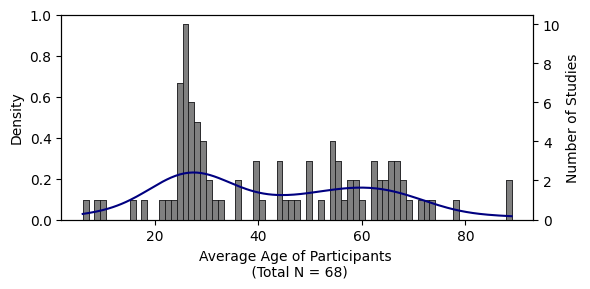

In [9]:
## age distribution histogram and density plots

fig, ax = plt.subplots()
plt.xlabel("Average Age of Participants \n (Total N = 68)")
plt.ylabel("Density")
ax2 = ax.twinx()
# set size 6x3
fig.set_size_inches(6, 3)
sns.histplot(avg_age, kde=True, ax=ax2, bins = 73, color = 'navy')
plt.hist(avg_age, color = 'grey', bins = 73, edgecolor = 'black', linewidth = .4)
plt.ylabel("Number of Studies")
plt.tight_layout()

# plt.savefig("agehist.pdf", format="pdf", bbox_inches="tight")
# plt.savefig("agehist.svg", format="svg", bbox_inches="tight")

plt.show()


In [10]:
## bootstrap confidence interval for the mean and median ages

## mean

samples = 10000  

def bootstrap_mean(data):
    resample = np.random.choice(data, size=len(data), replace=True)
    return np.mean(resample)

bootstrap_means = [bootstrap_mean(avg_age) for _ in range(samples)]

lower_percentile = .025
upper_percentile = 1 - lower_percentile

mean_lci = np.percentile(bootstrap_means, lower_percentile * 100)
mean_uci = np.percentile(bootstrap_means, upper_percentile * 100)

print("Bootstrap 95% CI for the mean:", (mean_lci, mean_uci))

## median 

def bootstrap_median(data):
    resample = np.random.choice(data, size=len(data), replace=True)
    return np.median(resample)

bootstrap_medians = [bootstrap_median(avg_age) for _ in range(samples)]

lower_percentile = (1 - 0.95) / 2
upper_percentile = 1 - lower_percentile

med_lci = np.percentile(bootstrap_medians, lower_percentile * 100)
med_uci = np.percentile(bootstrap_medians, upper_percentile * 100)

print("Bootstrap 95% CI for the median:", (med_lci, med_uci))

Bootstrap 95% CI for the mean: (39.031742105263156, 46.54759315789473)
Bootstrap 95% CI for the median: (29.4, 50.0)


### Reporting Dependencies

Includes: chi-squared tests, visualizations

In [11]:
raceAgeInd=pd.crosstab(participant_data["Race Present"],participant_data["Age Present"])
print('Race Age table :\n',raceAgeInd)

Race Age table :
 Age Present    0    1
Race Present         
0             35  125
1              2   13


In [12]:
chi2_stat, ra_p, dof, expected = scipy.stats.chi2_contingency(raceAgeInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {ra_p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)


chi2 statistic:     0.19716
p-value:            0.65702
degrees of freedom: 1
expected frequencies:
 [[ 33.82857143 126.17142857]
 [  3.17142857  11.82857143]]


In [13]:
raceGenderInd=pd.crosstab(participant_data["Race Present"],participant_data["Sex Present"])
print('Race Gender table :\n',raceGenderInd)

Race Gender table :
 Sex Present    0    1
Race Present         
0             35  125
1              1   14


In [14]:
chi2_stat, rg_p, dof, expected = scipy.stats.chi2_contingency(raceGenderInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {rg_p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1.1221
p-value:            0.28946
degrees of freedom: 1
expected frequencies:
 [[ 32.91428571 127.08571429]
 [  3.08571429  11.91428571]]


In [15]:
ethnAgeInd=pd.crosstab(participant_data["Ethnicity Present"],participant_data["Age Present"])
print('Ethnicity Gender table :\n',ethnAgeInd)

Ethnicity Gender table :
 Age Present         0    1
Ethnicity Present         
0                  37  131
1                   0    7


In [16]:
chi2_stat, ea_p, dof, expected = scipy.stats.chi2_contingency(ethnAgeInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {ea_p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     0.85719
p-value:            0.35453
degrees of freedom: 1
expected frequencies:
 [[ 35.52 132.48]
 [  1.48   5.52]]


In [17]:
ethnGenderInd=pd.crosstab(participant_data["Ethnicity Present"],participant_data["Sex Present"])
print('Ethnicity Gender table :\n',ethnGenderInd)

Ethnicity Gender table :
 Sex Present         0    1
Ethnicity Present         
0                  36  132
1                   0    7


In [18]:
chi2_stat, eg_p, dof, expected = scipy.stats.chi2_contingency(ethnGenderInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {eg_p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     0.80472
p-value:            0.36969
degrees of freedom: 1
expected frequencies:
 [[ 34.56 133.44]
 [  1.44   5.56]]


In [19]:
genderAgeInd=pd.crosstab(participant_data["Sex Present"],participant_data["Age Present"])
print('Gender Age table :\n',genderAgeInd)

Gender Age table :
 Age Present   0    1
Sex Present         
0            27    9
1            10  129


In [20]:
chi2_stat, ga_p, dof, expected = scipy.stats.chi2_contingency(genderAgeInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {ga_p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     74.837
p-value:            5.1132e-18
degrees of freedom: 1
expected frequencies:
 [[  7.61142857  28.38857143]
 [ 29.38857143 109.61142857]]


In [21]:
raceEthnInd=pd.crosstab(participant_data["Race Present"],participant_data["Ethnicity Present"])
print('Race Ethn table :\n',raceEthnInd)

Race Ethn table :
 Ethnicity Present    0  1
Race Present             
0                  159  1
1                    9  6


In [22]:
chi2_stat, re_p, dof, expected = scipy.stats.chi2_contingency(raceEthnInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {re_p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     45.592
p-value:            1.4564e-11
degrees of freedom: 1
expected frequencies:
 [[153.6   6.4]
 [ 14.4   0.6]]


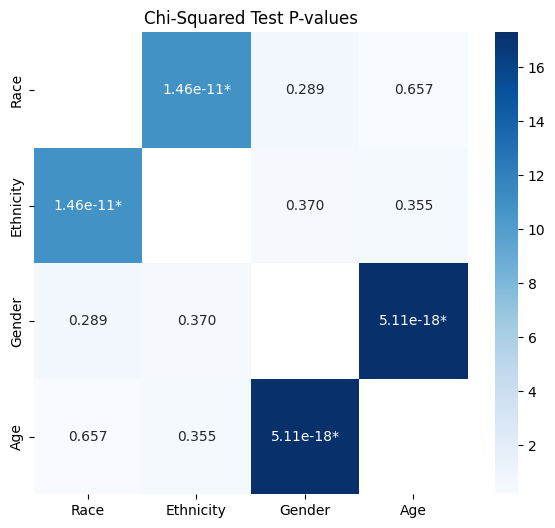

In [23]:
p_values = [
    [None, re_p, rg_p, ra_p],
    [re_p, None, eg_p, ea_p],
    [rg_p, eg_p, None, ga_p],
    [ra_p, ea_p, ga_p, None]
]
variable_names = ['Race', 'Ethnicity', 'Gender', 'Age']

p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

with np.errstate(divide='ignore'):
    log_p_values_df = -np.log10(p_values_df)
log_p_values_df.replace(-np.inf, np.nan, inplace=True)  

plt.figure(figsize=(7, 6))
cmap = sns.color_palette("Blues", as_cmap=True)

def format_annotation(val):
    if pd.isna(val):
        return 'N/A'  
    if val<.05:
        return f'{val:.2e}*'
    else:
        return f'{val:.3f}'

annot_df = p_values_df.applymap(format_annotation)

sns.heatmap(log_p_values_df, annot=annot_df, cmap=cmap, fmt='', cbar=True, annot_kws={'fontsize': 10})

plt.title('Chi-Squared Test P-values')
plt.show()
